# 1. Data Importing

1.1Import the value of the bonds, equity and FX rate


Saving Precios_Crisis.xlsx to Precios_Crisis.xlsx
                 IPC      SPX  ...  M_BONOS_421113  M_BONOS_471107
Date                           ...                                
2019-01-02  42271.14  2510.03  ...            8.85            8.85
2019-01-03  42044.32  2447.89  ...            8.77            8.79
2019-01-04  42455.13  2531.94  ...            8.60            8.61
2019-01-07  42834.20  2549.69  ...            8.71            8.71
2019-01-08  43542.87  2574.41  ...            8.82            8.83
...              ...      ...  ...             ...             ...
2021-06-28  50351.21  4290.61  ...            7.40            7.46
2021-06-29  50337.36  4291.80  ...            7.44            7.45
2021-06-30  50289.75  4297.50  ...            7.51            7.54
2021-07-01  50376.89  4319.94  ...            7.58            7.60
2021-07-02  50223.01  4352.34  ...            7.50            7.53

[630 rows x 22 columns]


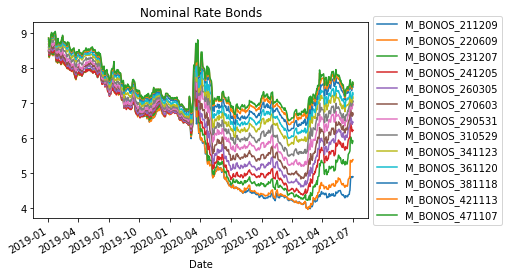

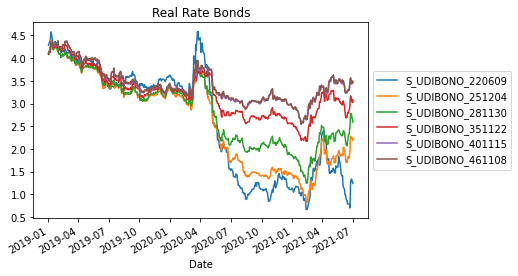

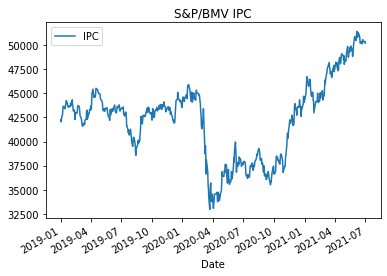

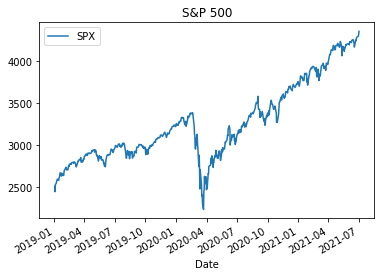

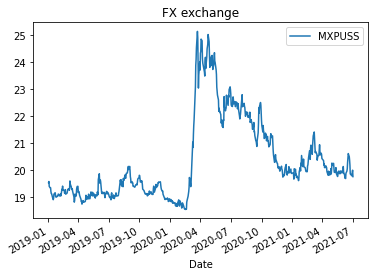

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import describe
import seaborn as sns
from matplotlib.pyplot import figure
from google.colab import files
uploaded = files.upload()

dfs = pd.read_excel('Precios_Crisis.xlsx',
    index_col='Date',
    parse_dates=True)

df= dfs.dropna()

df = df.sort_values(by = 'Date')

print(df)
df.head()
df.describe()

#Here we are spliting the data into type of security but for the PCA we have to see which bonds to use
Equity = df.iloc[:, 0:2]
FX= df.iloc[:, 2:3]
Real_bonds = df.iloc[:, 3:9]
Nominal_bonds= df.iloc[:, 9:22]

Nominal_bonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Nominal Rate Bonds")
plt.show()

Real_bonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Real Rate Bonds")
plt.show()

Equity["IPC"].plot()
plt.legend()
plt.title("S&P/BMV IPC")
plt.show()
Equity["SPX"].plot()
plt.legend()
plt.title("S&P 500")
plt.show()


FX.plot()
plt.legend()
plt.title("FX exchange")
plt.show()


# 2	Data Processing

2.1	Compute the daily returns of variables


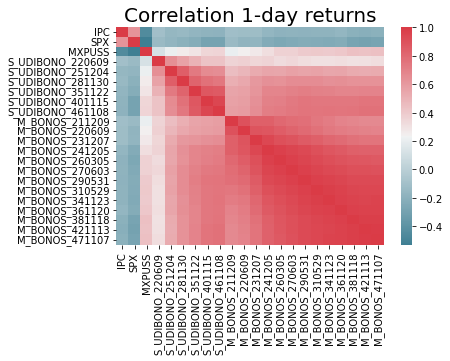

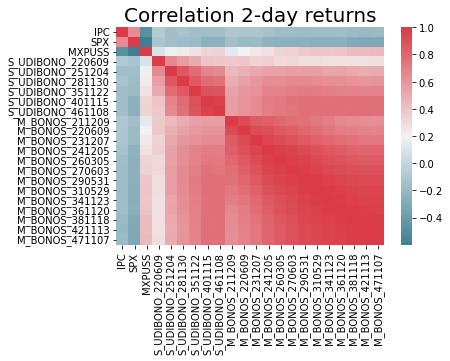

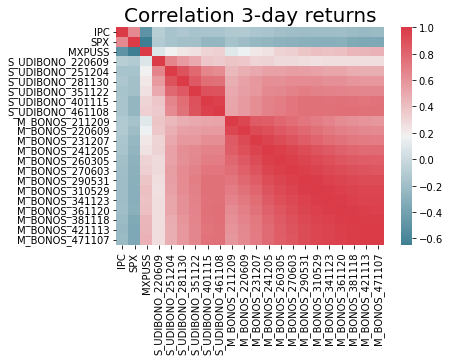

<Figure size 720x360 with 0 Axes>

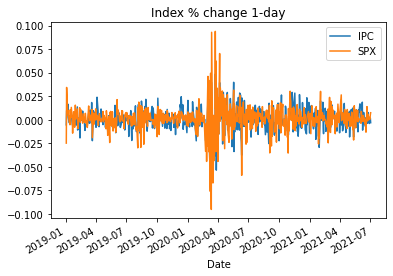

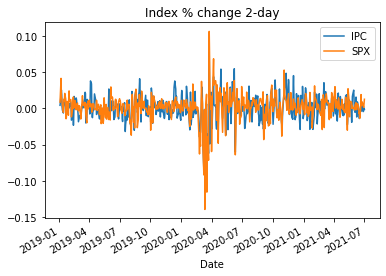

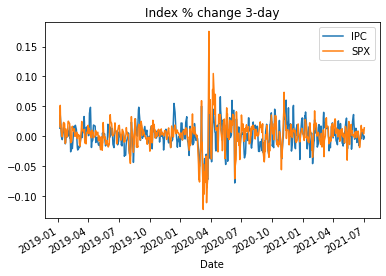

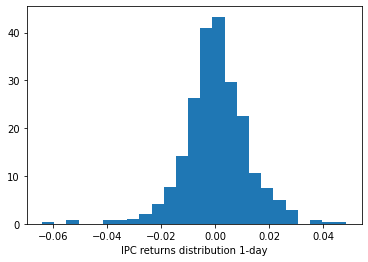

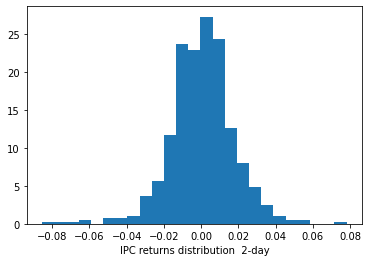

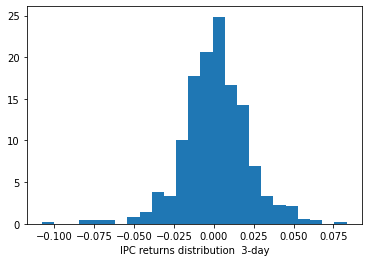

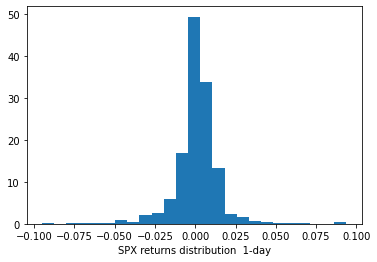

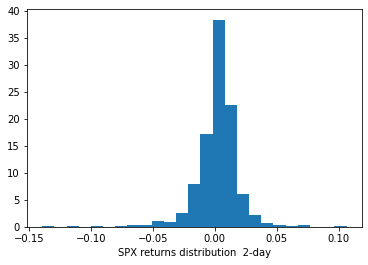

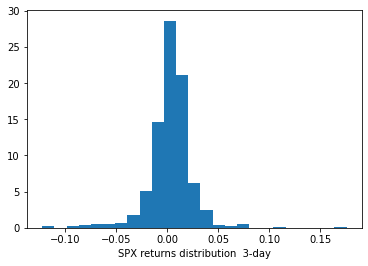

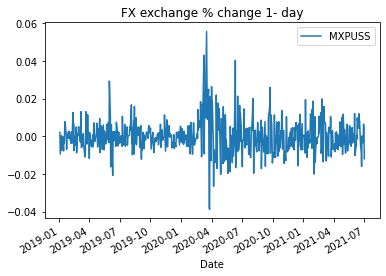

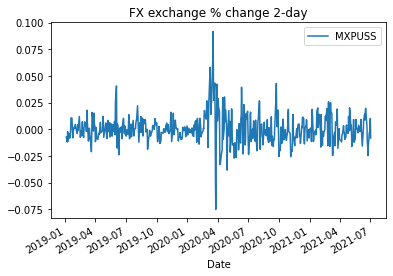

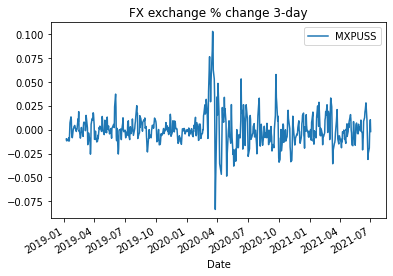

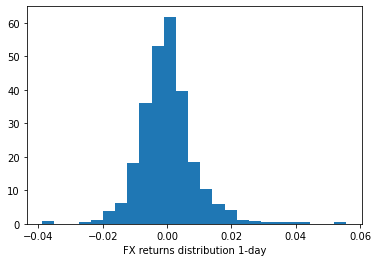

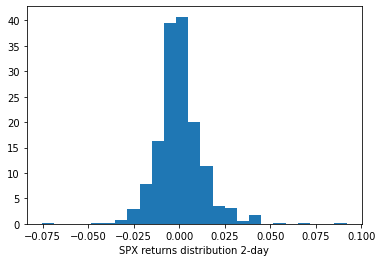

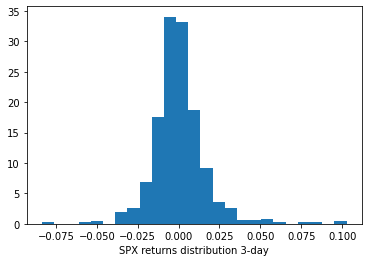

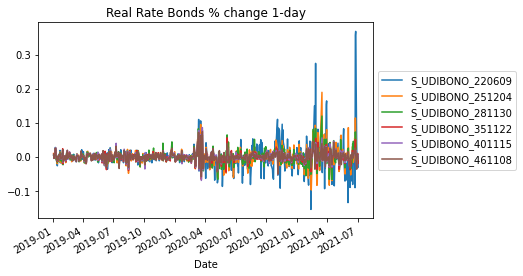

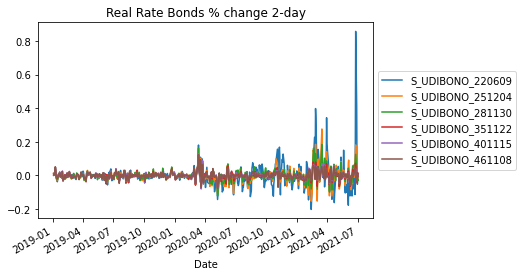

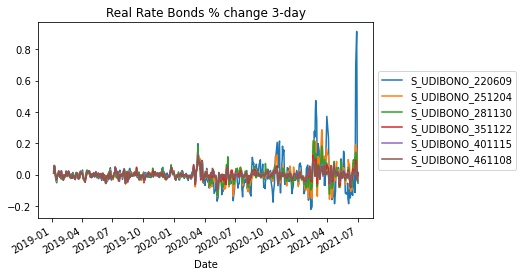

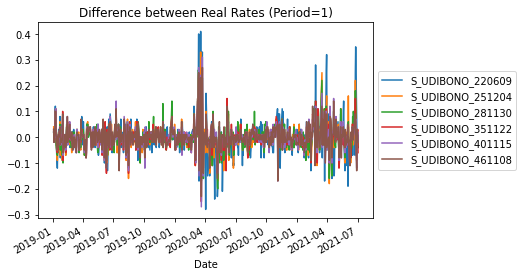

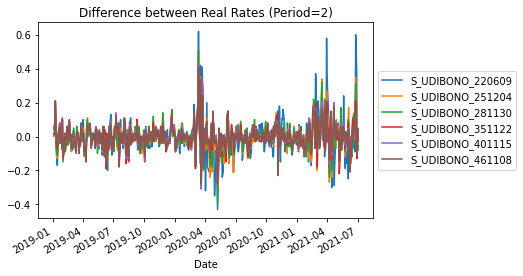

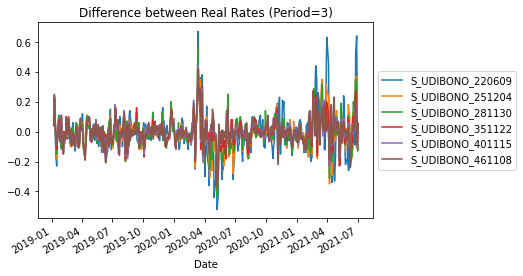

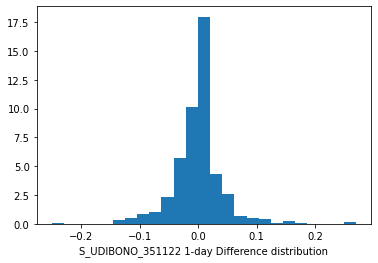

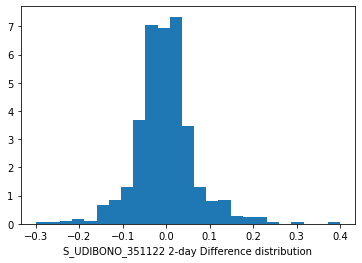

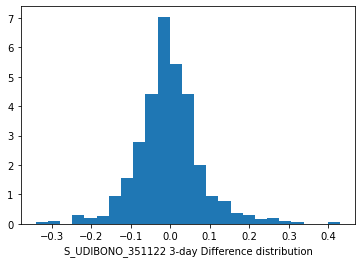

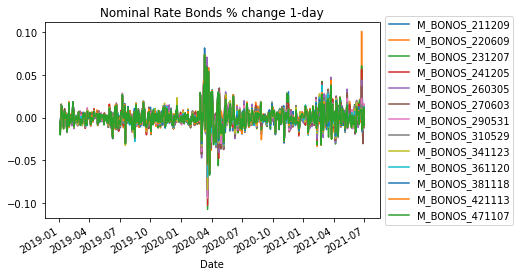

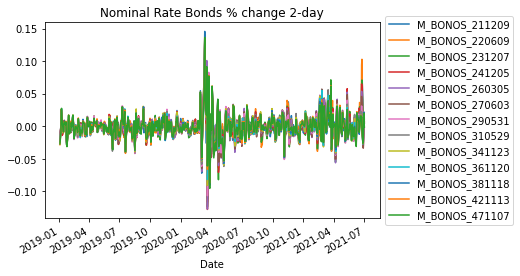

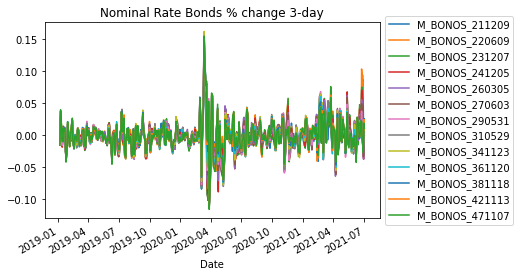

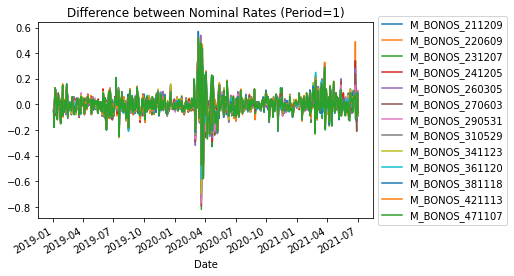

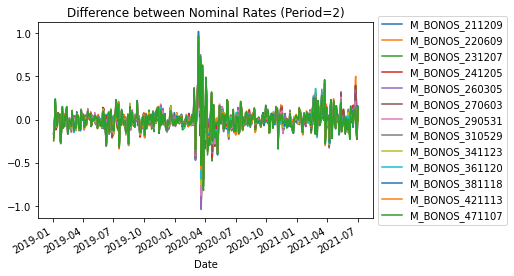

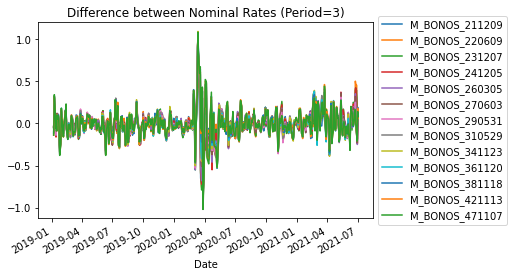

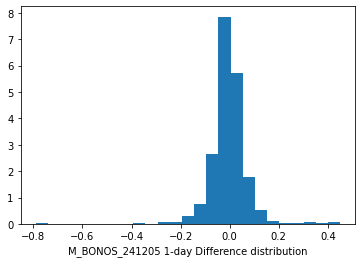

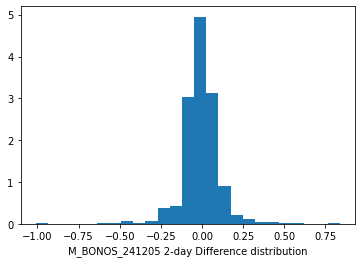

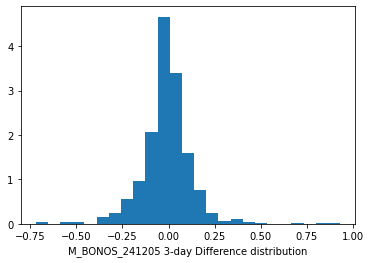

In [2]:
#One day returns
Returns = df.pct_change()
r=Returns.dropna()

r_equity = r.iloc[:, 0:2]
r_FX= r.iloc[:, 2:3]
r_Rbonds = r.iloc[:, 3:9]
r_bonds= r.iloc[:, 9:22]

#other period returns
Twodays_returns = df.pct_change(2) 
Threedays_returns = df.pct_change(3) 
r2=Twodays_returns.dropna()
r3=Threedays_returns.dropna()

r2_equity = r2.iloc[:, 0:2]
r2_FX= r2.iloc[:, 2:3]
r2_Rbonds = r2.iloc[:, 3:9]
r2_bonds= r2.iloc[:, 9:22]

r3_equity = r3.iloc[:, 0:2]
r3_FX= r3.iloc[:, 2:3]
r3_Rbonds = r3.iloc[:, 3:9]
r3_bonds= r3.iloc[:, 9:22]



#########

##one day
corr = r.loc[:,r.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation 1-day returns", fontsize =20)

plt.show()

##Two days
corr = r2.loc[:,r.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation 2-day returns", fontsize =20)
plt.show()


#Three days
corr = r3.loc[:,r.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation 3-day returns", fontsize =20)
plt.show()

########

fig= plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)


IPC=pd.DataFrame(r_equity['IPC'])
SPX=pd.DataFrame(r_equity['SPX'])

IPC2=pd.DataFrame(r2_equity['IPC'])
SPX2=pd.DataFrame(r2_equity['SPX'])

IPC3=pd.DataFrame(r3_equity['IPC'])
SPX3=pd.DataFrame(r3_equity['SPX'])


r_equity.plot()
plt.legend()
plt.title("Index % change 1-day")
plt.show()

r2_equity.plot()
plt.legend()
plt.title("Index % change 2-day")
plt.show()

r3_equity.plot()
plt.legend()
plt.title("Index % change 3-day")
plt.show()


plt.hist(r_equity['IPC'], bins=25, density=True)
plt.xlabel('IPC returns distribution 1-day')
plt.show()

plt.hist(r2_equity['IPC'], bins=25, density=True)
plt.xlabel('IPC returns distribution  2-day')
plt.show()

plt.hist(r3_equity['IPC'], bins=25, density=True)
plt.xlabel('IPC returns distribution  3-day')
plt.show()

plt.hist(r_equity['SPX'], bins=25, density=True)
plt.xlabel('SPX returns distribution  1-day')
plt.show()

plt.hist(r2_equity['SPX'], bins=25, density=True)
plt.xlabel('SPX returns distribution  2-day')
plt.show()

plt.hist(r3_equity['SPX'], bins=25, density=True)
plt.xlabel('SPX returns distribution  3-day')
plt.show()


r_FX.plot()
plt.legend()
plt.title("FX exchange % change 1- day")
plt.show()

r2_FX.plot()
plt.legend()
plt.title("FX exchange % change 2-day")
plt.show()

r3_FX.plot()
plt.legend()
plt.title("FX exchange % change 3-day")
plt.show()


plt.hist(r_FX['MXPUSS'], bins=25, density=True)
plt.xlabel('FX returns distribution 1-day')
plt.show()

plt.hist(r2_FX['MXPUSS'], bins=25, density=True)
plt.xlabel('SPX returns distribution 2-day')
plt.show()

plt.hist(r3_FX['MXPUSS'], bins=25, density=True)
plt.xlabel('SPX returns distribution 3-day')
plt.show()

r_Rbonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Real Rate Bonds % change 1-day")
plt.show()

r2_Rbonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Real Rate Bonds % change 2-day")
plt.show()

r3_Rbonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Real Rate Bonds % change 3-day")
plt.show()


#Difference one day
dummy = Real_bonds.diff(axis=0);
diff_Rbonds =dummy.dropna()
#Difference two days
dummy = Real_bonds.diff(axis=0,periods=2);
diff2_Rbonds =dummy.dropna()
#Difference three days
dummy = Real_bonds.diff(axis=0,periods=3);
diff3_Rbonds =dummy.dropna()

diff_Rbonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Difference between Real Rates (Period=1)")
plt.show()

diff2_Rbonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Difference between Real Rates (Period=2)")
plt.show()

diff3_Rbonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Difference between Real Rates (Period=3)")
plt.show()


plt.hist(diff_Rbonds['S_UDIBONO_351122'], bins=25, density=True)
plt.xlabel('S_UDIBONO_351122 1-day Difference distribution')
plt.show()

plt.hist(diff2_Rbonds['S_UDIBONO_351122'], bins=25, density=True)
plt.xlabel('S_UDIBONO_351122 2-day Difference distribution')
plt.show()

plt.hist(diff3_Rbonds['S_UDIBONO_351122'], bins=25, density=True)
plt.xlabel('S_UDIBONO_351122 3-day Difference distribution')
plt.show()

r_bonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Nominal Rate Bonds % change 1-day")
plt.show()

r2_bonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Nominal Rate Bonds % change 2-day")
plt.show()

r3_bonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Nominal Rate Bonds % change 3-day")
plt.show()



#Difference one day
dummy = Nominal_bonds.diff(axis=0);
diff_bonds =dummy.dropna()
#Difference two days
dummy = Nominal_bonds.diff(axis=0,periods=2);
diff2_bonds =dummy.dropna()
#Difference three days
dummy = Nominal_bonds.diff(axis=0,periods=3);
diff3_bonds =dummy.dropna()


diff_bonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Difference between Nominal Rates (Period=1)")
plt.show()	

diff2_bonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Difference between Nominal Rates (Period=2)")
plt.show()	

diff3_bonds.plot()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Difference between Nominal Rates (Period=3)")
plt.show()	


plt.hist(diff_bonds['M_BONOS_241205'], bins=25, density=True)
plt.xlabel('M_BONOS_241205 1-day Difference distribution')
plt.show()

plt.hist(diff2_bonds['M_BONOS_241205'], bins=25, density=True)
plt.xlabel('M_BONOS_241205 2-day Difference distribution')
plt.show()

plt.hist(diff3_bonds['M_BONOS_241205'], bins=25, density=True)
plt.xlabel('M_BONOS_241205 3-day Difference distribution')
plt.show()




 If the distribution is both symmetric and unimodal, then the mean = median = mode


A way to look at kurtosis is that it measures the width of a random distribution compared to that of a normal distribution with the same mean and variance as the distribution in question. If the distribution is symmetric about the mean, a distribution with a positive kurtosis will have a sharper peak and much longer tails than does the normal distribution. The opposite is the case for distributions with a negative kurtosis

Kurtosis measures something quite distinct from the standard deviation, althouhg the standard deviation of the standard deviations tell us how much information we have around the mean, do not tell us much about the extreme values. 





In [3]:

#One day
print("1-day metrics") 
d = describe(r)
des = pd.DataFrame([d], columns=d._fields)

desc=des.T
skw=des.iloc[0]['skewness']
kt=des.iloc[0]['kurtosis']
dev=des.iloc[0]['variance']

st=pd.DataFrame(r.describe().loc[['50%', 'mean']]).T
ET=st.index.values

stat=st.assign(ETs=ET)
STAT=stat.set_index('ETs')


SK = pd.DataFrame([skw]).T
sk=SK.assign(ETs=ET)
SKW=sk.set_index('ETs')
etf=SKW.index.values
SKW.columns=['Skewness']

KT = pd.DataFrame([kt]).T
kts=KT.assign(ETs=ET)
KTS=kts.set_index('ETs')
KTS.columns=['Kurtosis']

SD = pd.DataFrame([dev]).T**(1/2)
std=SD.assign(ETs=ET)
STD=std.set_index('ETs')
STD.columns=['Standard Deviation']


df2 = pd.concat([STAT, SKW],axis=1)
df3=pd.concat([df2, KTS],axis=1)
df4=pd.concat([df3, STD],axis=1)

print(df4)

#Twoday
print("2-day metrics")

d = describe(r2)
des = pd.DataFrame([d], columns=d._fields)

desc=des.T
skw=des.iloc[0]['skewness']
kt=des.iloc[0]['kurtosis']
dev=des.iloc[0]['variance']

st=pd.DataFrame(r.describe().loc[['50%', 'mean']]).T
ET=st.index.values

stat=st.assign(ETs=ET)
STAT=stat.set_index('ETs')


SK = pd.DataFrame([skw]).T
sk=SK.assign(ETs=ET)
SKW=sk.set_index('ETs')
etf=SKW.index.values
SKW.columns=['Skewness']

KT = pd.DataFrame([kt]).T
kts=KT.assign(ETs=ET)
KTS=kts.set_index('ETs')
KTS.columns=['Kurtosis']

SD = pd.DataFrame([dev]).T**(1/2)
std=SD.assign(ETs=ET)
STD=std.set_index('ETs')
STD.columns=['Standard Deviation']


df2 = pd.concat([STAT, SKW],axis=1)
df3=pd.concat([df2, KTS],axis=1)
df4=pd.concat([df3, STD],axis=1)

print(df4)
### Three day
print("3-day metrics")

d = describe(r3)
des = pd.DataFrame([d], columns=d._fields)

desc=des.T
skw=des.iloc[0]['skewness']
kt=des.iloc[0]['kurtosis']
dev=des.iloc[0]['variance']

st=pd.DataFrame(r.describe().loc[['50%', 'mean']]).T
ET=st.index.values

stat=st.assign(ETs=ET)
STAT=stat.set_index('ETs')


SK = pd.DataFrame([skw]).T
sk=SK.assign(ETs=ET)
SKW=sk.set_index('ETs')
etf=SKW.index.values
SKW.columns=['Skewness']

KT = pd.DataFrame([kt]).T
kts=KT.assign(ETs=ET)
KTS=kts.set_index('ETs')
KTS.columns=['Kurtosis']

SD = pd.DataFrame([dev]).T**(1/2)
std=SD.assign(ETs=ET)
STD=std.set_index('ETs')
STD.columns=['Standard Deviation']


df2 = pd.concat([STAT, SKW],axis=1)
df3=pd.concat([df2, KTS],axis=1)
df4=pd.concat([df3, STD],axis=1)

print(df4)



1-day metrics
                       50%      mean  Skewness   Kurtosis  Standard Deviation
ETs                                                                          
IPC              -0.000077  0.000345 -0.348769   3.168672            0.011928
SPX               0.001165  0.000980 -0.133081  12.084757            0.014427
MXPUSS           -0.000264  0.000056  0.800645   5.380338            0.008714
S_UDIBONO_220609  0.000000 -0.001264  3.297806  28.939610            0.038924
S_UDIBONO_251204  0.000000 -0.000713  1.200130   8.972539            0.024190
S_UDIBONO_281130  0.000000 -0.000532  0.999595   5.011498            0.019632
S_UDIBONO_351122  0.000000 -0.000380  0.589313   5.070578            0.013923
S_UDIBONO_401115  0.000000 -0.000193  0.816800   7.543896            0.013366
S_UDIBONO_461108  0.000000 -0.000180  0.640613   5.390581            0.013052
M_BONOS_211209    0.000000 -0.000828 -0.408113  14.513227            0.009687
M_BONOS_220609    0.000000 -0.000658  0.808410  18

# 3 Historical Value at Risk & Expected Shortfall

In [4]:
def value_at_risk(returns, confidence_level=.05):
  VaR_test1=returns.quantile(confidence_level, interpolation='linear')

  return VaR_test1

      
def expected_shortfall(returns, confidence_level=.05):
  ES=pd.DataFrame()
  var = value_at_risk(returns, confidence_level).values[0]
  c=returns.columns.values
  ES= returns.loc[(returns[c[0]]<var)]
  return ES.mean(axis=0).values[0]


# Historical VaR of all Data

In [5]:
historic_var_Rbonds=pd.DataFrame()
historic_var_bonds=pd.DataFrame()
k=pd.DataFrame()

names1=diff_Rbonds.columns.values
historic_var_Rbonds = pd.DataFrame(k, columns = names1)


names2=diff_bonds.columns.values
historic_var_bonds = pd.DataFrame(k, columns = names2)


historic_var_IPC = value_at_risk(IPC)
print(f'The simple historical VaR of the S&P/BMV IPC is {historic_var_IPC}')

historic_var_SPX = value_at_risk(SPX)
print(f'The simple historical VaR of the S&P 500 is {historic_var_SPX}')

historic_var_FX = value_at_risk(r_FX['MXPUSS'])
print(f'The simple historical VaR of the FX exchange is {historic_var_FX}')

#with a for print each element of the bonds
for column in diff_Rbonds:
    historic_var_Rbonds.loc[1, column] =   value_at_risk(diff_Rbonds[column])
    print(f'The simple historical VaR of the {column} is {value_at_risk(diff_Rbonds[column])}')

for column in diff_bonds:
    historic_var_bonds.loc[1, column] =   value_at_risk(diff_bonds[column])
    print(f'The simple historical VaR of the {column} is {value_at_risk(diff_bonds[column])}')


The simple historical VaR of the S&P/BMV IPC is IPC   -0.017967
Name: 0.05, dtype: float64
The simple historical VaR of the S&P 500 is SPX   -0.02107
Name: 0.05, dtype: float64
The simple historical VaR of the FX exchange is -0.01182037569051737
The simple historical VaR of the S_UDIBONO_220609 is -0.09599999999999989
The simple historical VaR of the S_UDIBONO_251204 is -0.08999999999999986
The simple historical VaR of the S_UDIBONO_281130 is -0.07999999999999963
The simple historical VaR of the S_UDIBONO_351122 is -0.07999999999999963
The simple historical VaR of the S_UDIBONO_401115 is -0.06999999999999984
The simple historical VaR of the S_UDIBONO_461108 is -0.06000000000000005
The simple historical VaR of the M_BONOS_211209 is -0.08599999999999992
The simple historical VaR of the M_BONOS_220609 is -0.08999999999999986
The simple historical VaR of the M_BONOS_231207 is -0.09000000000000075
The simple historical VaR of the M_BONOS_241205 is -0.10599999999999984
The simple historical 

#Historical Expected Shortfall of all Data

In [6]:
historic_es_Rbonds=pd.DataFrame()
historic_es_bonds=pd.DataFrame()

names1=diff_Rbonds.columns.values
historic_es_Rbonds = pd.DataFrame(k, columns = names1)


names2=diff_bonds.columns.values
historic_es_bonds = pd.DataFrame(k, columns = names2)


historic_es_IPC = expected_shortfall(IPC)
print(f'The simple historical ES of the S&P/BMV IPC is {historic_es_IPC}')

historic_es_SPX = expected_shortfall(SPX)
print(f'The simple historical ES of the S&P 500 is {historic_es_SPX}')

historic_es_FX = expected_shortfall(r_FX)
print(f'The simple historical ES of the FX exchange is {historic_es_FX}')

#with a for print each element of the bonds
for column in diff_Rbonds:
    bond=pd.DataFrame(diff_Rbonds[column])
    historic_es_Rbonds.loc[1, column] =   expected_shortfall(bond)
    print(f'The simple historical ES of the {column} is {expected_shortfall(bond)}')

for column in diff_bonds:
    bond=pd.DataFrame(diff_bonds[column])
    historic_es_bonds.loc[1, column] =   expected_shortfall(bond)
    print(f'The simple historical ES of the {column} is {expected_shortfall(bond)}')

The simple historical ES of the S&P/BMV IPC is -0.027810377333536498
The simple historical ES of the S&P 500 is -0.03663700309199301
The simple historical ES of the FX exchange is -0.01747754622773176
The simple historical ES of the S_UDIBONO_220609 is -0.14656249999999993
The simple historical ES of the S_UDIBONO_251204 is -0.1126666666666667
The simple historical ES of the S_UDIBONO_281130 is -0.10774193548387098
The simple historical ES of the S_UDIBONO_351122 is -0.10548387096774192
The simple historical ES of the S_UDIBONO_401115 is -0.10862068965517241
The simple historical ES of the S_UDIBONO_461108 is -0.10483870967741936
The simple historical ES of the M_BONOS_211209 is -0.146875
The simple historical ES of the M_BONOS_220609 is -0.17000000000000004
The simple historical ES of the M_BONOS_231207 is -0.17699999999999996
The simple historical ES of the M_BONOS_241205 is -0.181875
The simple historical ES of the M_BONOS_260305 is -0.19968750000000002
The simple historical ES of t

#Calculate weigths

In [7]:
#According to the formula of AWR
def weigths(returns, lda=.98):
  index = returns.index
  n= len(index)
  W=pd.DataFrame()
  names1=returns.index.values
  W = pd.DataFrame(k, index = names1)
  w=((1-lda)/(1-(lda**n)))
  j=1
  for i in index:
    W.loc[i, 1] = w*(lda**(n-j))
    j=j+1
  W.columns =['Weigths']
  return W
#print(weigths(r_FX).sum())

def awr_method(returns,weigths):
  result = pd.concat([returns, weigths], axis=1)
  names1=returns.columns.values
  v=result.sort_values(by=names1[0])
  vv=v.cumsum()
  yy=vv.loc[(vv['Weigths'] <= .05) ]
  del yy[names1[0]]
  result3 = pd.concat([returns, yy], axis=1, join="inner")
  vy=result3.sort_values(by=names1[0])
  t=vy[names1[0]]
  return t

#Example
#tail=awr_method(r_FX,weigths(r_FX))
#print(tail)
#VaR_test=tail.iloc[-1]
#print(VaR_test)

#Calculate the new serie muiply with weigths, is not used in this code
def AWR(returns):
  index = returns.index
  awr=pd.DataFrame()
  names1=returns.index.values
  W = weigths(returns)
  awr = W.iloc[:, 0].multiply(returns.iloc[:, 0], axis="index")
  return awr



#Calculate Age weigthed historical VaR

In [8]:
def AWR_VaR(returns):
  tail=awr_method(returns,weigths(returns))
  awr_VaR=tail.iloc[-1]
  return awr_VaR


#Calculate Age weigthed historical ES

In [9]:
def AWR_ES(returns):
  tail=awr_method(returns,weigths(returns))
  awr_ES=tail.mean(axis=0)
  return awr_ES


In [10]:
#Truncate data since the date + 1 year

from datetime import date, timedelta
def add_days_to_date(date, days):
    """Add days to a date and return the date.
    
    Args: 
        date (string): Date string in YYYY-MM-DD format. 
        days (int): Number of days to add to date
    
    Returns: 
        date (date): Date in YYYY-MM-DD with X days added. 
    """
    
    added_date = pd.to_datetime(date) + timedelta(days=days)
    added_date = added_date.strftime("%Y-%m-%d")

    return added_date

#Example
#date_addition_example = add_days_to_date('2020-07-03', 365)
#date_addition_example

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

#Definition for one year returns 
def returns2(returns,since_date):
  t_returns=pd.DataFrame()
  added_date = pd.to_datetime(since_date) + timedelta(days=365)
  added_date = added_date.strftime("%Y-%m-%d")
  t_returns=returns.truncate(before =since_date, after =added_date)
  return t_returns

#Example for one year
#print(returns2(r_FX,'2020-07-03'))
#ex = r_FX.truncate(before = '2020-07-03')
#print(ex)



#Historical Age weigthed VaR for all Data

In [11]:
awr_VaR_Rbonds=pd.DataFrame()
awr_VaR_bonds=pd.DataFrame()
bond=pd.DataFrame()

names1=diff_Rbonds.columns.values
awr_VaR_Rbonds = pd.DataFrame(k, columns = names1)

names2=diff_bonds.columns.values
awr_VaR_bonds = pd.DataFrame(k, columns = names2)

awr_VaR_IPC = AWR_VaR(IPC)
print(f'The Age Weigthed VaR of the S&P/BMV IPC is {awr_VaR_IPC}')

awr_VaR_SPX = AWR_VaR(SPX)
print(f'The Age Weigthed VaR of the S&P 500 is {awr_VaR_SPX}')

awr_VaR_FX = AWR_VaR(r_FX)
print(f'The Age Weigthed VaR of the FX exchange is {awr_VaR_FX}')

#with a for print each element of the bonds
for column in diff_Rbonds:
  bond=pd.DataFrame(diff_Rbonds[column])
  awr_VaR_Rbonds.loc[1, column] =   AWR_VaR(bond)
  print(f'The Age Weigthed VaR of the {column} is {AWR_VaR(bond)}')

for column in diff_bonds:
  bond=pd.DataFrame(diff_bonds[column])
  awr_VaR_bonds.loc[1, column] =  AWR_VaR(bond)
  print(f'The Age Weigthed VaR of the {column} is {AWR_VaR(bond)}')

The Age Weigthed VaR of the S&P/BMV IPC is -0.01364684575831232
The Age Weigthed VaR of the S&P 500 is -0.013124547000611053
The Age Weigthed VaR of the FX exchange is -0.012183420952685542
The Age Weigthed VaR of the S_UDIBONO_220609 is -0.1399999999999999
The Age Weigthed VaR of the S_UDIBONO_251204 is -0.0900000000000003
The Age Weigthed VaR of the S_UDIBONO_281130 is -0.08000000000000007
The Age Weigthed VaR of the S_UDIBONO_351122 is -0.10000000000000009
The Age Weigthed VaR of the S_UDIBONO_401115 is -0.10000000000000009
The Age Weigthed VaR of the S_UDIBONO_461108 is -0.10000000000000009
The Age Weigthed VaR of the M_BONOS_211209 is -0.040000000000000036
The Age Weigthed VaR of the M_BONOS_220609 is -0.05000000000000071
The Age Weigthed VaR of the M_BONOS_231207 is -0.08999999999999986
The Age Weigthed VaR of the M_BONOS_241205 is -0.09999999999999964
The Age Weigthed VaR of the M_BONOS_260305 is -0.1200000000000001
The Age Weigthed VaR of the M_BONOS_270603 is -0.11000000000000

In [12]:
awr_ES_Rbonds=pd.DataFrame()
awr_ES_bonds=pd.DataFrame()
bond=pd.DataFrame()

names1=diff_Rbonds.columns.values
awr_ES_Rbonds = pd.DataFrame(k, columns = names1)

names2=diff_bonds.columns.values
awr_ES_bonds = pd.DataFrame(k, columns = names2)

awr_ES_IPC = AWR_ES(IPC)
print(f'The Age Weigthed ES of the S&P/BMV IPC is {awr_ES_IPC}')

awr_ES_SPX = AWR_ES(SPX)
print(f'The Age Weigthed ES of the S&P 500 is {awr_ES_SPX}')

awr_ES_FX = AWR_ES(r_FX)
print(f'The Age Weigthed ES of the FX exchange is {awr_ES_FX}')

#with a for print each element of the bonds
for column in diff_Rbonds:
  bond=pd.DataFrame(diff_Rbonds[column])
  awr_ES_Rbonds.loc[1, column] =   AWR_ES(bond)
  print(f'The Age Weigthed ES of the {column} is {AWR_ES(bond)}')

for column in diff_bonds:
  bond=pd.DataFrame(diff_bonds[column])
  awr_ES_bonds.loc[1, column] =  AWR_ES(bond)
  print(f'The Age Weigthed ES of the {column} is {AWR_ES(bond)}')

The Age Weigthed ES of the S&P/BMV IPC is -0.022463540435599755
The Age Weigthed ES of the S&P 500 is -0.028145774748998185
The Age Weigthed ES of the FX exchange is -0.01765680482213199
The Age Weigthed ES of the S_UDIBONO_220609 is -0.18266666666666667
The Age Weigthed ES of the S_UDIBONO_251204 is -0.11518518518518521
The Age Weigthed ES of the S_UDIBONO_281130 is -0.10965517241379312
The Age Weigthed ES of the S_UDIBONO_351122 is -0.12437499999999999
The Age Weigthed ES of the S_UDIBONO_401115 is -0.13999999999999987
The Age Weigthed ES of the S_UDIBONO_461108 is -0.13428571428571426
The Age Weigthed ES of the M_BONOS_211209 is -0.08732673267326743
The Age Weigthed ES of the M_BONOS_220609 is -0.10986486486486495
The Age Weigthed ES of the M_BONOS_231207 is -0.16250000000000003
The Age Weigthed ES of the M_BONOS_241205 is -0.17081081081081087
The Age Weigthed ES of the M_BONOS_260305 is -0.20225806451612904
The Age Weigthed ES of the M_BONOS_270603 is -0.19531250000000003
The Age W

#All Metrics for one date with one year information with out saving in dataframe

In [13]:

def All(returns,since_date):
  name=returns.columns.values
  ret=returns2(returns,since_date)
  index = ret.index
  n= len(index)
  ExS = expected_shortfall(ret)
  VaR=value_at_risk(ret).values[0]
  ES_AWR=AWR_ES(ret)
  VaR_AWR=AWR_VaR(ret)
  print(f'The analysis use {n} observations')
  print(f'The simple historical ES of the {name} is {ExS}')
  print(f'The simple historical VaR of the {name} is {VaR}')
  print(f'The Age weigthed Expected Shortfall of the {name}  is {ES_AWR}')
  print(f'The Age weigthed Value at Risk of the {name} is {VaR_AWR}')
  return

All(IPC,'2020-07-03')
All(SPX,'2020-07-03')
All(r_equity,'2020-07-03')

for column in diff_bonds:
  bond=pd.DataFrame(diff_bonds[column])
  All(bond,'2020-07-03')

for column in diff_Rbonds:
  bond=pd.DataFrame(diff_Rbonds[column])
  All(bond,'2020-07-03')


The analysis use 252 observations
The simple historical ES of the ['IPC'] is -0.01960932587514413
The simple historical VaR of the ['IPC'] is -0.015907362730618657
The Age weigthed Expected Shortfall of the ['IPC']  is -0.01752463131614297
The Age weigthed Value at Risk of the ['IPC'] is -0.013750965452457908
The analysis use 252 observations
The simple historical ES of the ['SPX'] is -0.022679120402568705
The simple historical VaR of the ['SPX'] is -0.014325065981824248
The Age weigthed Expected Shortfall of the ['SPX']  is -0.020958987806801034
The Age weigthed Value at Risk of the ['SPX'] is -0.013124547000611053
The analysis use 252 observations
The simple historical ES of the ['IPC' 'SPX'] is -0.01960932587514413
The simple historical VaR of the ['IPC' 'SPX'] is -0.015907362730618657
The Age weigthed Expected Shortfall of the ['IPC' 'SPX']  is -0.01752463131614297
The Age weigthed Value at Risk of the ['IPC' 'SPX'] is -0.013750965452457908
The analysis use 252 observations
The sim

In [14]:
#All metrics on a dataframes for one day returns 
start_date = date(2019, 1, 1)

end_date = date(2020, 7, 3) #to have at last one year of observations

Risk_SPX=pd.DataFrame()
Risk_IPC=pd.DataFrame()
Risk_FX=pd.DataFrame()



for single_date in daterange(start_date, end_date):

  ex=returns2(r_FX,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk_FX=Risk_FX.append(df2, ignore_index=True)

Risk_FX.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk_FX.set_index('Date', inplace=True)

for single_date in daterange(start_date, end_date):

  ex=returns2(IPC,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk_IPC=Risk_IPC.append(df2, ignore_index=True)

Risk_IPC.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk_IPC.set_index('Date', inplace=True)

for single_date in daterange(start_date, end_date):

  ex=returns2(SPX,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk_SPX=Risk_SPX.append(df2, ignore_index=True)

Risk_SPX.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk_SPX.set_index('Date', inplace=True)






In [15]:
#All metrics on a dataframes for two day returns 
start_date = date(2019, 1, 1)

end_date = date(2020, 7, 3) #to have at last one year of observations

Risk2_SPX=pd.DataFrame()
Risk2_IPC=pd.DataFrame()
Risk2_FX=pd.DataFrame()



for single_date in daterange(start_date, end_date):

  ex=returns2(r2_FX,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk2_FX=Risk2_FX.append(df2, ignore_index=True)

Risk2_FX.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk2_FX.set_index('Date', inplace=True)

for single_date in daterange(start_date, end_date):

  ex=returns2(IPC2,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk2_IPC=Risk2_IPC.append(df2, ignore_index=True)

Risk2_IPC.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk2_IPC.set_index('Date', inplace=True)

for single_date in daterange(start_date, end_date):

  ex=returns2(SPX2,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk2_SPX=Risk2_SPX.append(df2, ignore_index=True)

Risk2_SPX.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk2_SPX.set_index('Date', inplace=True)




In [16]:
#All metrics on a dataframes for three days returns 
start_date = date(2019, 1, 1)

end_date = date(2020, 7, 3) #to have at last one year of observations

Risk3_SPX=pd.DataFrame()
Risk3_IPC=pd.DataFrame()
Risk3_FX=pd.DataFrame()



for single_date in daterange(start_date, end_date):

  ex=returns2(r3_FX,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk3_FX=Risk3_FX.append(df2, ignore_index=True)

Risk3_FX.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk3_FX.set_index('Date', inplace=True)

for single_date in daterange(start_date, end_date):

  ex=returns2(IPC3,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk3_IPC=Risk3_IPC.append(df2, ignore_index=True)

Risk3_IPC.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk3_IPC.set_index('Date', inplace=True)

for single_date in daterange(start_date, end_date):

  ex=returns2(SPX3,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk3_SPX=Risk3_SPX.append(df2, ignore_index=True)

Risk3_SPX.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk3_SPX.set_index('Date', inplace=True)


In [17]:
#after PCA Anlysis we have to define these frames one-day returns
Risk_M_BONOS_241205=pd.DataFrame()
Risk_S_UDIBONO_351122=pd.DataFrame()

M241205=pd.DataFrame(diff_bonds['M_BONOS_241205'])

for single_date in daterange(start_date, end_date):

  ex=returns2(M241205,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk_M_BONOS_241205=Risk_M_BONOS_241205.append(df2, ignore_index=True)

Risk_M_BONOS_241205.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk_M_BONOS_241205.set_index('Date', inplace=True)

S351122=pd.DataFrame(diff_Rbonds['S_UDIBONO_351122'])

for single_date in daterange(start_date, end_date):

  ex=returns2(S351122,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk_S_UDIBONO_351122=Risk_S_UDIBONO_351122.append(df2, ignore_index=True)

Risk_S_UDIBONO_351122.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk_S_UDIBONO_351122.set_index('Date', inplace=True)


In [18]:
#after PCA Anlysis we have to define these frames two-day returns
Risk2_M_BONOS_241205=pd.DataFrame()
Risk2_S_UDIBONO_351122=pd.DataFrame()

M241205=pd.DataFrame(diff2_bonds['M_BONOS_241205'])

for single_date in daterange(start_date, end_date):

  ex=returns2(M241205,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk2_M_BONOS_241205=Risk2_M_BONOS_241205.append(df2, ignore_index=True)

Risk2_M_BONOS_241205.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk2_M_BONOS_241205.set_index('Date', inplace=True)

S351122=pd.DataFrame(diff2_Rbonds['S_UDIBONO_351122'])

for single_date in daterange(start_date, end_date):

  ex=returns2(S351122,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk2_S_UDIBONO_351122=Risk2_S_UDIBONO_351122.append(df2, ignore_index=True)

Risk2_S_UDIBONO_351122.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk2_S_UDIBONO_351122.set_index('Date', inplace=True)

In [19]:
#after PCA Anlysis we have to define these frames three-day returns
Risk3_M_BONOS_241205=pd.DataFrame()
Risk3_S_UDIBONO_351122=pd.DataFrame()

M241205=pd.DataFrame(diff3_bonds['M_BONOS_241205'])

for single_date in daterange(start_date, end_date):

  ex=returns2(M241205,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk3_M_BONOS_241205=Risk3_M_BONOS_241205.append(df2, ignore_index=True)

Risk3_M_BONOS_241205.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk3_M_BONOS_241205.set_index('Date', inplace=True)

S351122=pd.DataFrame(diff3_Rbonds['S_UDIBONO_351122'])

for single_date in daterange(start_date, end_date):

  ex=returns2(S351122,single_date.strftime("%Y-%m-%d"))
  added_date = pd.to_datetime(single_date) + timedelta(days=365)
  df2 =  pd.Series([added_date,expected_shortfall(ex),value_at_risk(ex).values[0], AWR_ES(ex),AWR_VaR(ex)])
  Risk3_S_UDIBONO_351122=Risk3_S_UDIBONO_351122.append(df2, ignore_index=True)

Risk3_S_UDIBONO_351122.columns =['Date', 'ES','VaR','AWR_ES','AWR_VaR']
Risk3_S_UDIBONO_351122.set_index('Date', inplace=True)

#Plots of the Risk Metrics

In [20]:
neg_IPC= IPC.loc[(IPC.IPC<0)]
neg_IPC=returns2(neg_IPC,'2020-07-03')



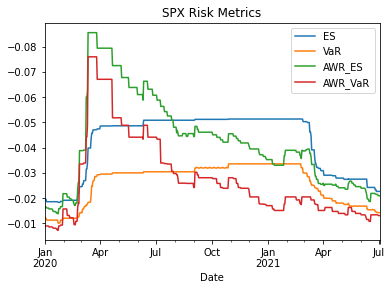

No handles with labels found to put in legend.


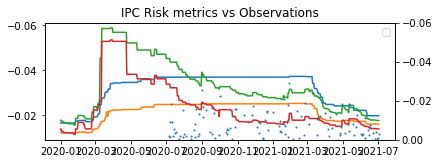

<Figure size 432x288 with 0 Axes>

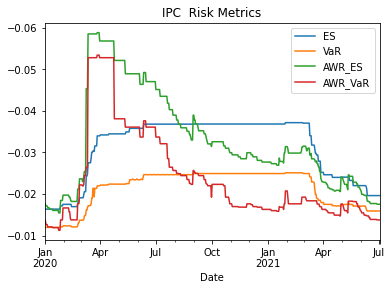

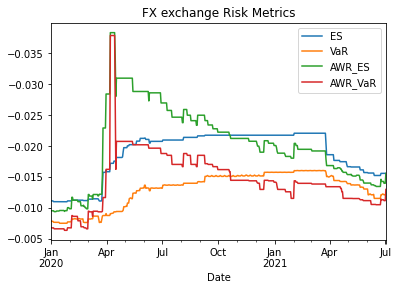

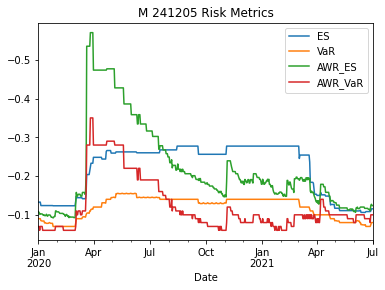

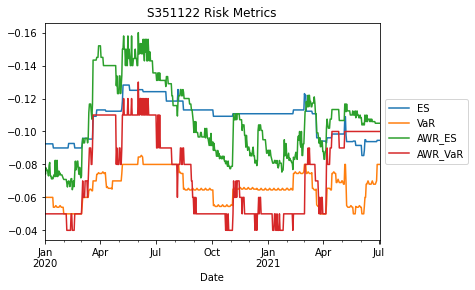

In [21]:
gph=Risk_SPX.plot()
gph.invert_yaxis()
plt.legend()
plt.title("SPX Risk Metrics")
plt.show()

plt.subplot(2,1,1)
plt.tight_layout()
plt.gca().invert_yaxis()
p=plt.plot(Risk_IPC)
plt.twinx()
plt.tight_layout()
plt.gca().invert_yaxis()
pt=plt.scatter(x=neg_IPC.index, y=neg_IPC['IPC'],s=1)
plt.ylim([0, -.06])
plt.legend()
plt.title("IPC Risk metrics vs Observations")
plt.show()


plt.tight_layout()
gph=Risk_IPC.plot()
gph.invert_yaxis()
plt.legend()
plt.title("IPC  Risk Metrics")
plt.show()



gph=Risk_FX.plot()
gph.invert_yaxis()
plt.legend()
plt.title("FX exchange Risk Metrics")
plt.show()


gph=Risk_M_BONOS_241205.plot()
gph.invert_yaxis()
plt.legend()
plt.title("M 241205 Risk Metrics")
plt.show()


gph=Risk_S_UDIBONO_351122.plot()
gph.invert_yaxis()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("S351122 Risk Metrics")
plt.show()

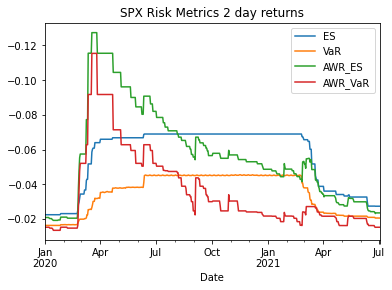

<Figure size 432x288 with 0 Axes>

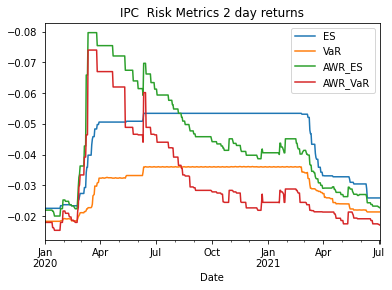

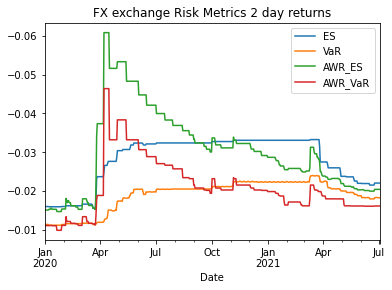

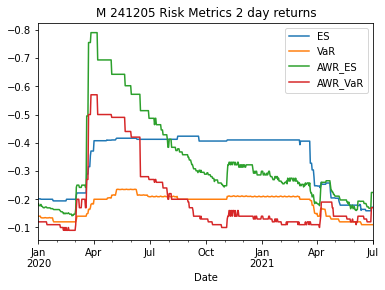

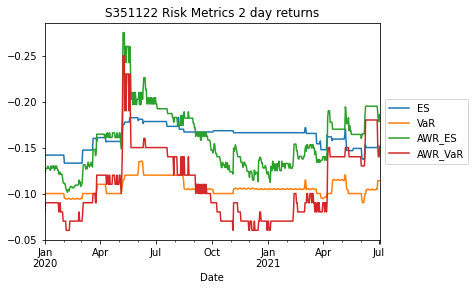

In [22]:
gph=Risk2_SPX.plot()
gph.invert_yaxis()
plt.legend()
plt.title("SPX Risk Metrics 2 day returns")
plt.show()


plt.tight_layout()
gph=Risk2_IPC.plot()
gph.invert_yaxis()
plt.legend()
plt.title("IPC  Risk Metrics 2 day returns")
plt.show()



gph=Risk2_FX.plot()
gph.invert_yaxis()
plt.legend()
plt.title("FX exchange Risk Metrics 2 day returns")
plt.show()


gph=Risk2_M_BONOS_241205.plot()
gph.invert_yaxis()
plt.legend()
plt.title("M 241205 Risk Metrics 2 day returns")
plt.show()


gph=Risk2_S_UDIBONO_351122.plot()
gph.invert_yaxis()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("S351122 Risk Metrics 2 day returns")
plt.show()

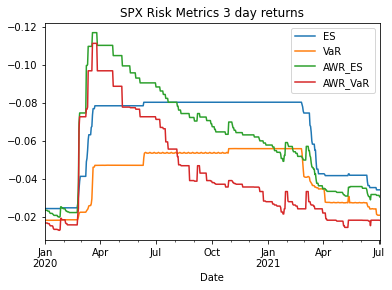

<Figure size 432x288 with 0 Axes>

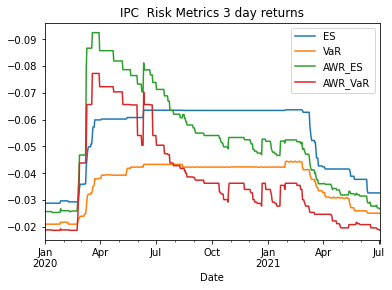

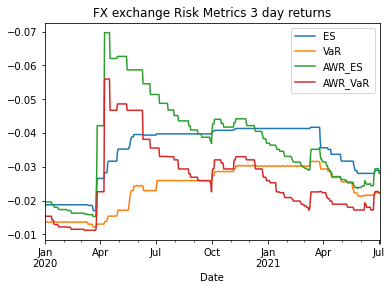

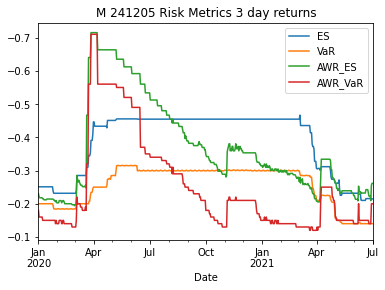

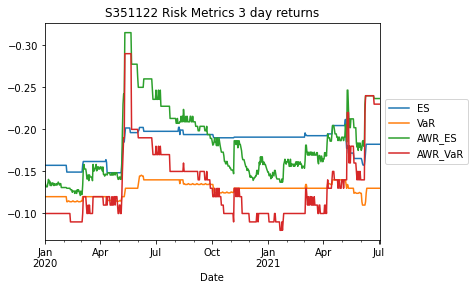

In [23]:
gph=Risk3_SPX.plot()
gph.invert_yaxis()
plt.legend()
plt.title("SPX Risk Metrics 3 day returns")
plt.show()


plt.tight_layout()
gph=Risk3_IPC.plot()
gph.invert_yaxis()
plt.legend()
plt.title("IPC  Risk Metrics 3 day returns")
plt.show()



gph=Risk3_FX.plot()
gph.invert_yaxis()
plt.legend()
plt.title("FX exchange Risk Metrics 3 day returns")
plt.show()


gph=Risk3_M_BONOS_241205.plot()
gph.invert_yaxis()
plt.legend()
plt.title("M 241205 Risk Metrics 3 day returns")
plt.show()


gph=Risk3_S_UDIBONO_351122.plot()
gph.invert_yaxis()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("S351122 Risk Metrics 3 day returns")
plt.show()

In [24]:
vol_IPC=pd.DataFrame()
for single_date in daterange(start_date, end_date):

  ex=returns2(IPC,single_date.strftime("%Y-%m-%d"))
  vol= ex.std()*1**.5
  vol_IPC=vol_IPC.append(vol, ignore_index=True)

vol_SPX=pd.DataFrame()
for single_date in daterange(start_date, end_date):

  ex=returns2(SPX,single_date.strftime("%Y-%m-%d"))
  vol= ex.std()*1**.5
  vol_SPX=vol_SPX.append(vol, ignore_index=True)

vol_FX=pd.DataFrame()
for single_date in daterange(start_date, end_date):

  ex=returns2(r_FX,single_date.strftime("%Y-%m-%d"))
  vol= ex.std()*1**.5
  vol_FX=vol_FX.append(vol, ignore_index=True)

vol_M241205=pd.DataFrame()
for single_date in daterange(start_date, end_date):

  ex=returns2(r_FX,single_date.strftime("%Y-%m-%d"))
  vol= ex.std()*1**.5
  vol_M241205=vol_M241205.append(vol, ignore_index=True)

vol_S351122=pd.DataFrame()
for single_date in daterange(start_date, end_date):

  ex=returns2(S351122,single_date.strftime("%Y-%m-%d"))
  vol= ex.std()*1**.5
  vol_S351122=vol_S351122.append(vol, ignore_index=True)

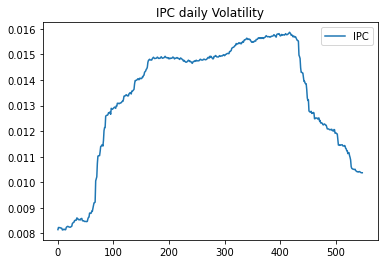

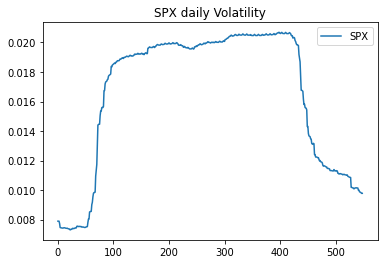

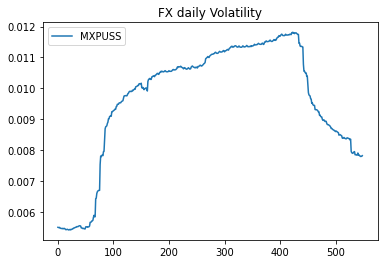

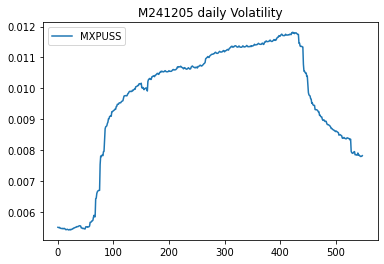

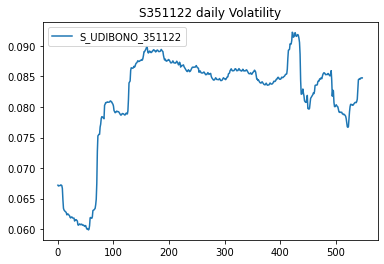

In [25]:
vol_IPC.plot()
plt.legend()
plt.title("IPC daily Volatility")
plt.show()

vol_SPX.plot()
plt.legend()
plt.title("SPX daily Volatility")
plt.show()

vol_FX.plot()
plt.legend()
plt.title("FX daily Volatility")
plt.show()

vol_M241205.plot()
plt.legend()
plt.title("M241205 daily Volatility")
plt.show()

vol_S351122.plot()
plt.legend()
plt.title("S351122 daily Volatility")
plt.show()

#Backtest

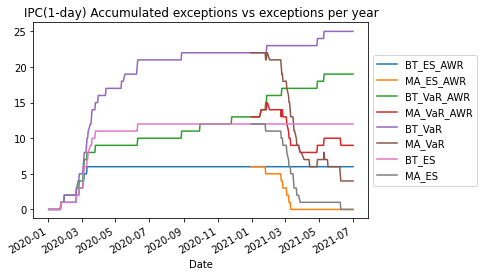

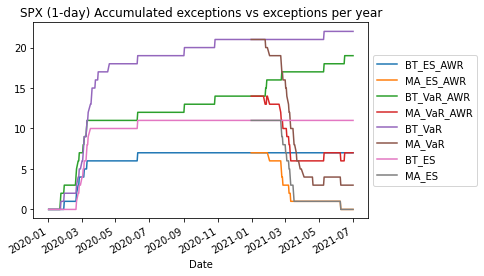

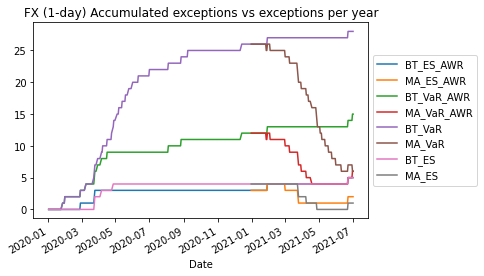

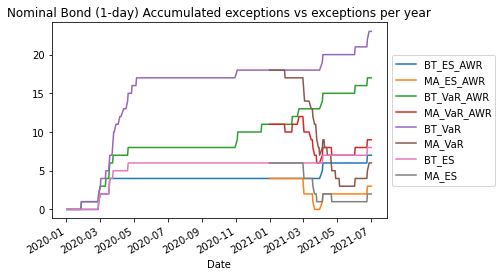

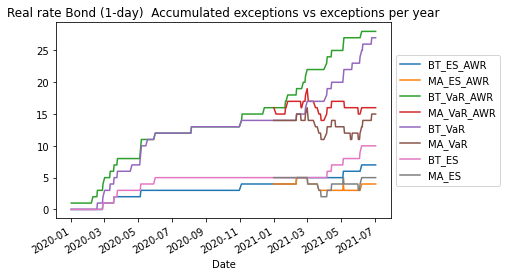

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
def Backtest(returns,RiskMetrics):
  t=pd.DataFrame(returns.shift(periods=-1, fill_value=0) ) #to compare with the next observations, other wise is contain in the metric
  name=returns.columns.values
  result_4 = pd.concat([RiskMetrics, t], axis=1, join="inner") 
  ind = result_4.index
  DF_BT=pd.DataFrame(index=ind)
  #define choices
  choices = ['0', '1']

  #define conditions 
  conditions = [result_4 [name[0]] > result_4 ['AWR_ES'], 
              result_4 [name[0]] < result_4 ['AWR_ES']]
  #create new column in DataFrame that displays results of comparisons
  DF_BT['BT_ES_AWR'] = np.select(conditions, choices, default='1')
  DF_BT['BT_ES_AWR'] = pd.to_numeric(DF_BT['BT_ES_AWR'])
  DF_BT['MA_ES_AWR'] = DF_BT['BT_ES_AWR'].rolling(window=252, min_periods=252).mean()*252 #to return the moving accumulated exceptions
  DF_BT['BT_ES_AWR'] =DF_BT['BT_ES_AWR'].cumsum(axis = 0)

  #define conditions 
  conditions = [result_4 [name[0]] > result_4 ['AWR_VaR'], 
              result_4 [name[0]] < result_4 ['AWR_VaR']]
  #create new column in DataFrame that displays results of comparisons
  DF_BT['BT_VaR_AWR'] = np.select(conditions, choices, default='1')
  DF_BT['BT_VaR_AWR'] = pd.to_numeric(DF_BT['BT_VaR_AWR'])
  DF_BT['MA_VaR_AWR'] = DF_BT['BT_VaR_AWR'].rolling(window=252, min_periods=252).mean()*252 #to return the moving accumulated exceptions
  DF_BT['BT_VaR_AWR'] =DF_BT['BT_VaR_AWR'].cumsum(axis = 0)

  #define conditions 
  conditions = [result_4 [name[0]] > result_4 ['VaR'], 
              result_4 [name[0]] < result_4 ['VaR']]
  #create new column in DataFrame that displays results of comparisons
  DF_BT['BT_VaR'] = np.select(conditions, choices, default='1')
  DF_BT['BT_VaR'] = pd.to_numeric(DF_BT['BT_VaR'])
  DF_BT['MA_VaR'] = DF_BT['BT_VaR'].rolling(window=252, min_periods=252).mean()*252 #to return the moving accumulated exceptions
  DF_BT['BT_VaR'] =DF_BT['BT_VaR'].cumsum(axis = 0)

  #define conditions 
  conditions = [result_4 [name[0]] > result_4 ['ES'], 
              result_4 [name[0]] < result_4 ['ES']]
  #create new column in DataFrame that displays results of comparisons
  DF_BT['BT_ES'] = np.select(conditions, choices, default='1')
  DF_BT['BT_ES'] = pd.to_numeric(DF_BT['BT_ES'])
  DF_BT['MA_ES'] = DF_BT['BT_ES'].rolling(window=252, min_periods=252).mean()*252 #to return the moving accumulated exceptions
  DF_BT['BT_ES']=DF_BT['BT_ES'].cumsum(axis = 0) #accumulated exceptions


  return DF_BT

BT_IPC=Backtest(IPC,Risk_IPC)
BT_IPC.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("IPC(1-day) Accumulated exceptions vs exceptions per year")
plt.show()

BT_SPX=Backtest(SPX,Risk_SPX)
BT_SPX.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("SPX (1-day) Accumulated exceptions vs exceptions per year")
plt.show()

BT_FX=Backtest(r_FX,Risk_FX)
BT_FX.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("FX (1-day) Accumulated exceptions vs exceptions per year")
plt.show()

M241205=pd.DataFrame(diff_bonds['M_BONOS_241205'])
BT_M241205=Backtest(M241205,Risk_M_BONOS_241205)
BT_M241205.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Nominal Bond (1-day) Accumulated exceptions vs exceptions per year")
plt.show()

S351122=pd.DataFrame(diff_Rbonds['S_UDIBONO_351122'])
BT_S351122=Backtest(S351122,Risk_S_UDIBONO_351122)
BT_S351122.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Real rate Bond (1-day)  Accumulated exceptions vs exceptions per year")
plt.show()

#just to print the report of the exceptions
from google.colab import files
BT_M241205.to_csv('BT1.csv') 
files.download('BT1.csv')




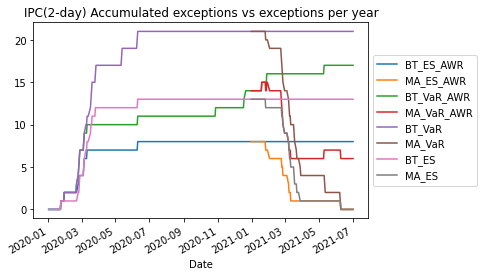

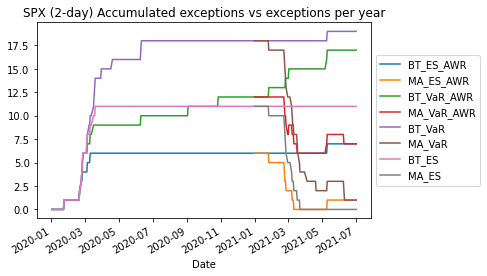

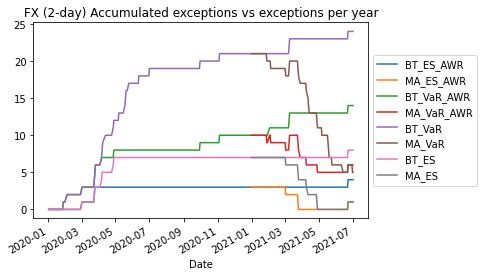

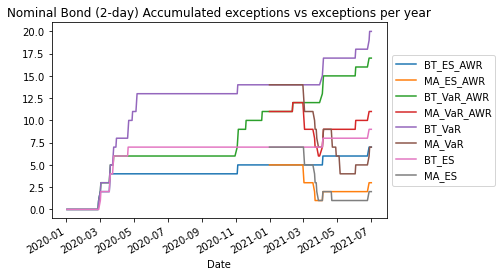

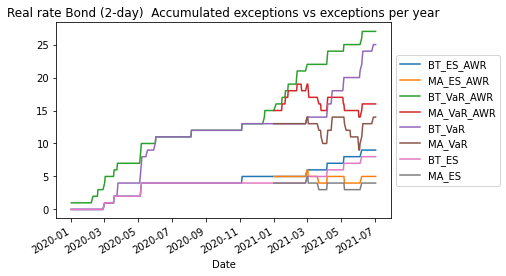

In [27]:
BT2_IPC=Backtest(IPC2,Risk2_IPC)
BT2_IPC.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("IPC(2-day) Accumulated exceptions vs exceptions per year")
plt.show()

BT2_SPX=Backtest(SPX2,Risk2_SPX)
BT2_SPX.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("SPX (2-day) Accumulated exceptions vs exceptions per year")
plt.show()

BT2_FX=Backtest(r2_FX,Risk2_FX)
BT2_FX.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("FX (2-day) Accumulated exceptions vs exceptions per year")
plt.show()

M241205=pd.DataFrame(diff2_bonds['M_BONOS_241205'])
BT2_M241205=Backtest(M241205,Risk2_M_BONOS_241205)
BT2_M241205.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Nominal Bond (2-day) Accumulated exceptions vs exceptions per year")
plt.show()

S351122=pd.DataFrame(diff2_Rbonds['S_UDIBONO_351122'])
BT2_S351122=Backtest(S351122,Risk2_S_UDIBONO_351122)
BT2_S351122.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Real rate Bond (2-day)  Accumulated exceptions vs exceptions per year")
plt.show()


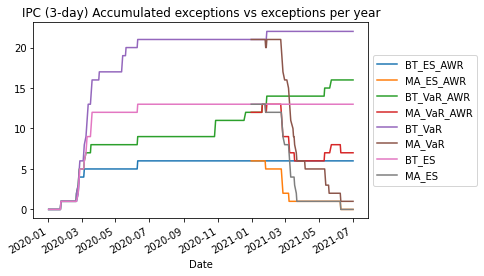

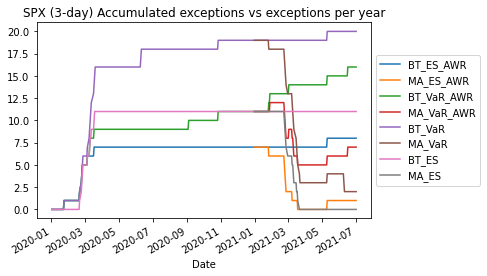

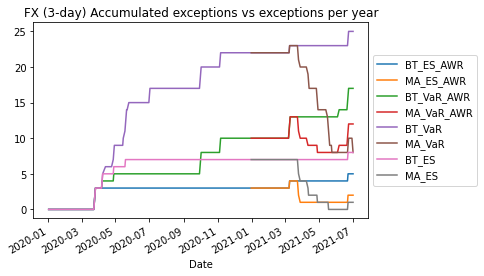

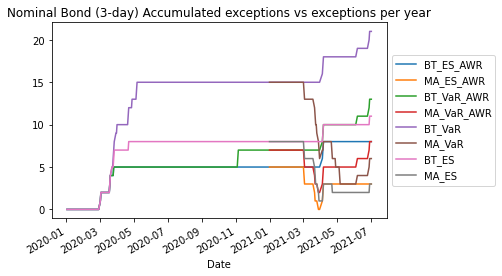

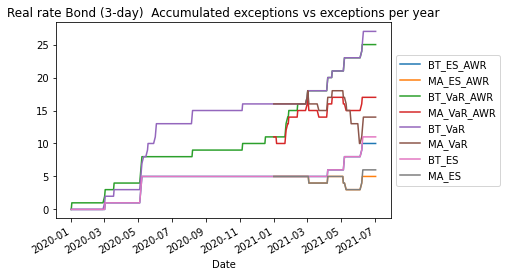

In [28]:
BT3_IPC=Backtest(IPC3,Risk3_IPC)
BT3_IPC.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("IPC (3-day) Accumulated exceptions vs exceptions per year")
plt.show()

BT3_SPX=Backtest(SPX3,Risk3_SPX)
BT3_SPX.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("SPX (3-day) Accumulated exceptions vs exceptions per year")
plt.show()

BT3_FX=Backtest(r3_FX,Risk3_FX)
BT3_FX.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("FX (3-day) Accumulated exceptions vs exceptions per year")
plt.show()

M241205=pd.DataFrame(diff3_bonds['M_BONOS_241205'])
BT3_M241205=Backtest(M241205,Risk3_M_BONOS_241205)
BT3_M241205.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Nominal Bond (3-day) Accumulated exceptions vs exceptions per year")
plt.show()

S351122=pd.DataFrame(diff3_Rbonds['S_UDIBONO_351122'])
BT3_S351122=Backtest(S351122,Risk3_S_UDIBONO_351122)
BT3_S351122.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Real rate Bond (3-day)  Accumulated exceptions vs exceptions per year")
plt.show()

# 4	Data Summaries.   Extreme Values



The trimmed mean is the mean ignoring values outside given limits, so an outlier could be a value that is part of the 5% higher or lower of the information


In [ ]:
from scipy import stats
Trim=stats.trim_mean(r, 0.05)
print(Trim)

[ 0.00046853  0.00125556 -0.00020354 -0.00289454 -0.00153688 -0.00137507
 -0.00059137 -0.0004566  -0.00040457 -0.00076356 -0.00064066 -0.00056833
 -0.00052321 -0.00045138 -0.00047621 -0.00042185 -0.00040724 -0.00043654
 -0.00044801 -0.00042733 -0.00045832 -0.00042441]


Inter-quartile range.  Compute the standard deviation.  How do these relate?

The interquartile range is a measure of where the “middle fifty” is in a data set. Where a range is a measure of where the beginning and end are in a set, an interquartile range is a measure of where the bulk of the values lie. Standard deviation is a measure of amount of dispersion of a set of values. 

Interquartile does not take into account all the values in the dataset, but mainly their positions when the data is ordered. It is not affected as much by outliers or data that is skewed or not normalized.


In [ ]:
# Computing IQR
Q1 = r.quantile(0.25)
Q3 = r.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

r.describe().loc[[ 'std']].T


IPC                 0.012911
SPX                 0.010552
MXPUSS              0.009139
S_UDIBONO_220609    0.021970
S_UDIBONO_251204    0.017043
S_UDIBONO_281130    0.015657
S_UDIBONO_351122    0.012825
S_UDIBONO_401115    0.012266
S_UDIBONO_461108    0.012274
M_BONOS_211209      0.007827
M_BONOS_220609      0.009961
M_BONOS_231207      0.010496
M_BONOS_241205      0.011100
M_BONOS_260305      0.011243
M_BONOS_270603      0.011283
M_BONOS_290531      0.011306
M_BONOS_310529      0.010985
M_BONOS_341123      0.010457
M_BONOS_361120      0.010464
M_BONOS_381118      0.010124
M_BONOS_421113      0.010136
M_BONOS_471107      0.009963
dtype: float64


,std
IPC,0.011928
SPX,0.014427
MXPUSS,0.008714
S_UDIBONO_220609,0.038924
S_UDIBONO_251204,0.024190
S_UDIBONO_281130,0.019632
S_UDIBONO_351122,0.013923
S_UDIBONO_401115,0.013366
S_UDIBONO_461108,0.013052
M_BONOS_211209,0.009687


Bootstraping the Standard Deviation

In [ ]:
import random
iterations=100

bstd = pd.DataFrame(index=ETF,columns=["A"])
for x in range(iterations):
    sample=random.randint(50,100)/100
    boots=r.sample(frac=sample, replace=True, random_state=1)
    sample_std=boots.describe().loc[[ 'std']].T
    bstd=pd.concat([bstd, sample_std],axis=1)

del bstd['A']   
print(bstd.std(axis=1))

IPC                 0.000129
SPX                 0.000244
MXPUSS              0.000233
S_UDIBONO_220609    0.001747
S_UDIBONO_251204    0.000460
S_UDIBONO_281130    0.000196
S_UDIBONO_351122    0.000214
S_UDIBONO_401115    0.000152
S_UDIBONO_461108    0.000152
M_BONOS_211209      0.000265
M_BONOS_220609      0.000479
M_BONOS_231207      0.000350
M_BONOS_241205      0.000332
M_BONOS_260305      0.000236
M_BONOS_270603      0.000218
M_BONOS_290531      0.000213
M_BONOS_310529      0.000153
M_BONOS_341123      0.000187
M_BONOS_361120      0.000122
M_BONOS_381118      0.000171
M_BONOS_421113      0.000171
M_BONOS_471107      0.000163
dtype: float64
